In [26]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Build Pandas Dataframe

In [2]:
dataset_name_clean = "data_full_64_clean.txt"
dataset_path = ".\\data\\"

with open(dataset_path+dataset_name_clean) as json_file:
    data = json.load(json_file)

In [3]:
# Get column names
columns = list(data['0'].keys())
columns.remove('album_url')

records = []

for item in data.keys():
    record = []
    for col in columns:
        record.append(data[item][col])
    records.append(record)

albums_df = pd.DataFrame(records, columns=columns)
albums_df.head()

,artist_id,artist_name,album_id,album_name,album_popularity,genres,filepath
0,5me0Irg2ANcsgc93uaYrpb,The Notorious B.I.G.,7dRdaGSxgcBdJnrOviQRuB,Life After Death (2014 Remastered Edition),78,"[east coast hip hop, gangster rap, hardcore hi...",.\images_64\7dRdaGSxgcBdJnrOviQRuB.jpg
1,36QJpDe2go2KgaRleHCDTp,Led Zeppelin,6P5QHz4XtxOmS5EuiGIPut,Led Zeppelin III (Remaster),74,"[album rock, classic rock, hard rock, rock]",.\images_64\6P5QHz4XtxOmS5EuiGIPut.jpg
2,5WUlDfRSoLAfcVSX1WnrxN,Sia,77jAfTh3KH9K2reMOmTgOh,This Is Acting,74,"[australian dance, australian pop, dance pop, ...",.\images_64\77jAfTh3KH9K2reMOmTgOh.jpg
3,0dEvJpkqhrcn64d3oI8v79,Barenaked Ladies,0DuFDnZcj7B4R0Jik1aDmY,Stunt (20th Anniversary Edition),66,"[canadian pop, canadian rock, comic, pop rock]",.\images_64\0DuFDnZcj7B4R0Jik1aDmY.jpg
4,2BvzbqWWwLN11XGBYgDZzx,Terror Squad,0NTYMm0B7adXejff1phD3F,True Story,61,"[bronx hip hop, hardcore hip hop]",.\images_64\0NTYMm0B7adXejff1phD3F.jpg


In [174]:
from skimage.io import imread
from sklearn.model_selection import train_test_split

image_list = []

for img_path in albums_df['filepath']:
    image = imread(img_path)
    resized_image = resize(image, (64,64)) 
    image_list.append(resized_image)
    
albums_df['img'] = image_list


y = np.array(albums_df['album_popularity'])
y

X = albums_df['img']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

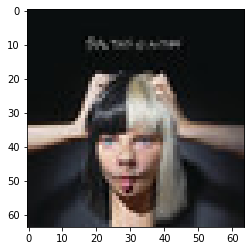

In [44]:
plt.imshow(albums_df['img'][2])

In [6]:
import cv2

Found 0 Faces!


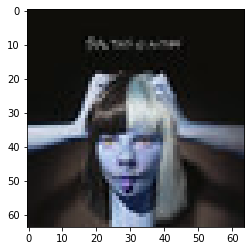

In [45]:
image = cv2.imread(albums_df.filepath[2])

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')    
faces = faceCascade.detectMultiScale(gray)

print(f"Found {len(faces)} Faces!")

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plt.imshow(image)

In [36]:
image = cv2.imread(albums_df.filepath[3])
image.shape

(64, 64, 3)

In [ ]:
hog = cv2.HOGDescriptor()
h = hog.compute(image)

In [24]:
winSize = (20,20)
blockSize = (10,10)
blockStride = (5,5)
cellSize = (10,10)
nbins = 9
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64
useSignedGradients = True

hog = cv2.HOGDescriptor(winSize,
                        blockSize,
                        blockStride,
                        cellSize,
                        nbins,
                        derivAperture,
                        winSigma,
                        histogramNormType,
                        L2HysThreshold,
                        gammaCorrection,
                        nlevels, 
                        useSignedGradients)

AttributeError: 'function' object has no attribute 'compute'

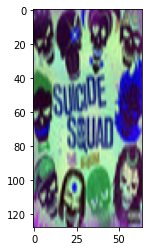

In [34]:
image = cv2.imread(albums_df.filepath[20])
dim = (64, 128)
  
# resize image
resized = cv2.resize(image, dim)
plt.imshow(resized)
h = hog.compute(resized)
h.shape

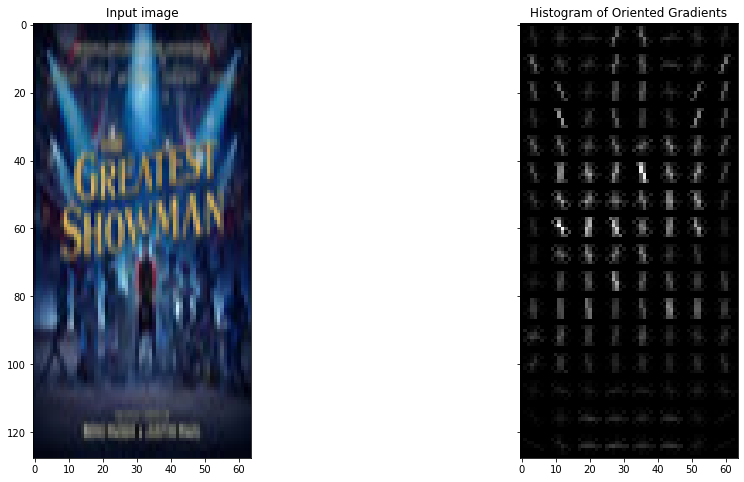

(3780,)

In [31]:
#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline

image = imread(albums_df.filepath[2233])
resized_img = resize(image, (128,64)) 
 

fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

fd.shape

In [101]:
X_train.shape

(1856,)

In [175]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

import skimage

class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X],  dtype="object")

class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X],  dtype="object")
        except:
            return np.array([local_hog(img) for img in X],  dtype="object")

hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)


X_train_gray = RGB2GrayTransformer().fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = StandardScaler().fit_transform(X_train_hog)


<ipython-input-175-9125364e6628>:20: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  return np.array([skimage.color.rgb2gray(img) for img in X],  dtype="object")


In [176]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=2000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)



SGDClassifier(max_iter=2000, random_state=42)

In [181]:
X_test_gray = RGB2GrayTransformer().fit_transform(X_test)
X_test_hog = hogify.fit_transform(X_test_gray)
X_test_prepared = StandardScaler().fit_transform(X_test_hog)

<ipython-input-175-9125364e6628>:20: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  return np.array([skimage.color.rgb2gray(img) for img in X],  dtype="object")


In [182]:
y_pred = sgd_clf.predict(X_test_prepared)

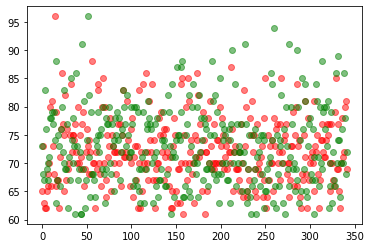

In [190]:
plt.plot(y_pred,'ro', alpha = 0.5)
plt.plot(y_test,'go', alpha = 0.5)

In [187]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score

rms = mean_squared_error(y_test, y_pred, squared=False)

rms

r2_score(y_test, y_pred) 

 
    

 

-0.51595657334478